In [ ]:
#1a
''' 
Aim: Implement numerical computation techniques in Python, focusing on
handling overflow and underflow.

Overflow and underflow
Overflow occurs when numbers exceed the representable range of data types
Undeflow happens when the numbers become too small to be represented accurately

We can prevent it by using higher precision data types and implementing conditional checks

Logarithmic transformation:
For products of large numbers or divisions of small numbers, use logarithmic
transformations to avoid overflow or underflow (e.g., log(a * b) = log(a) +
log(b)).

We can use clipping functions to constrain values within a defined range.

Use Decimal or mpmath for arbitrary precision arithmetic, minimizing
overflow/underflow risk.

Use try-except blocks to manage exceptions like OverflowError and
UnderflowError.'''

In [ ]:
import numpy as np
import tensorflow as tf
def handle_overflow_underflow():
    # Simulating Large and Small Numbers
    large_number = np.exp(1000) # This would cause an overflow
    small_number = np.exp(-1000) # This would cause an underflow
    print("Raw Computation:")
    print("Large Number (exp(1000)):", large_number)
    print("Small Number (exp(-1000)):", small_number)
    # Handling Overflow & Underflow using NumPy
    safe_large = np.exp(np.clip(1000, -700, 700))
    #Clipping the large values: values greater than 700 are clipped to 700 
    # (since np.exp(700) is large but not an overflow).
    # Values less than -700 are clipped to -700.
    safe_small = np.exp(np.clip(-1000, -700, 700))
    print("\nSafe Computation:")
    print("Safe Large (exp(1000) clipped):", safe_large)
    print("Safe Small (exp(-1000) clipped):", safe_small)
def log_sum_exp_trick():
    """ Numerically stable softmax computation """
    x = np.array([1000, 2000, 3000]) # Large numbers that cause overflow
    max_x = np.max(x)
    stable_x = x - max_x #By subtracting the max value from every array, the max value become 0.
    softmax = np.exp(stable_x) / np.sum(np.exp(stable_x))
    print("\nSoftmax with Log-Sum-Exp Trick:", softmax)
def gradient_clipping():
    """ Demonstrate gradient clipping in TensorFlow """
    gradients = tf.constant([1.0, 10.0, 100.0, 1000.0])
    clipped_gradients = tf.clip_by_value(gradients, -5.0, 5.0)
    print("\nGradient Clipping:")
    print("Original Gradients:", gradients.numpy())
    print("Clipped Gradients:", clipped_gradients.numpy())
if __name__ == "__main__":
    handle_overflow_underflow()
    log_sum_exp_trick()
    gradient_clipping()

Raw Computation:
Large Number (exp(1000)): inf
Small Number (exp(-1000)): 0.0

Safe Computation:
Safe Large (exp(1000) clipped): 1.0142320547350045e+304
Safe Small (exp(-1000) clipped): 9.85967654375977e-305

Softmax with Log-Sum-Exp Trick: [0. 0. 1.]

Gradient Clipping:
Original Gradients: [   1.   10.  100. 1000.]
Clipped Gradients: [1. 5. 5. 5.]


C:\Users\Artophilic\AppData\Local\Temp\ipykernel_7092\1032773920.py:5: RuntimeWarning: overflow encountered in exp
  large_number = np.exp(1000) # This would cause an overflow


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


c:\Users\Artophilic\anaconda3\envs\practvenv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training with Batch Gradient Descent...
Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.0598 - loss: 2.4321 - val_accuracy: 0.0619 - val_loss: 2.4246
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step - accuracy: 0.0618 - loss: 2.4219 - val_accuracy: 0.0646 - val_loss: 2.4144
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step - accuracy: 0.0635 - loss: 2.4119 - val_accuracy: 0.0682 - val_loss: 2.4044
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step - accuracy: 0.0661 - loss: 2.4021 - val_accuracy: 0.0703 - val_loss: 2.3944
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step - accuracy: 0.0684 - loss: 2.3924 - val_accuracy: 0.0747 - val_loss: 2.3846
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step - accuracy: 0.0710 - loss: 2.3828 - val_accuracy: 0.0772 - val_loss: 2.3750
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step - accuracy: 0.0735 - loss: 2.3734 - val_accuracy: 0.0807 - val_loss: 2.3654
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step - accuracy: 0.0763 - loss: 2.36

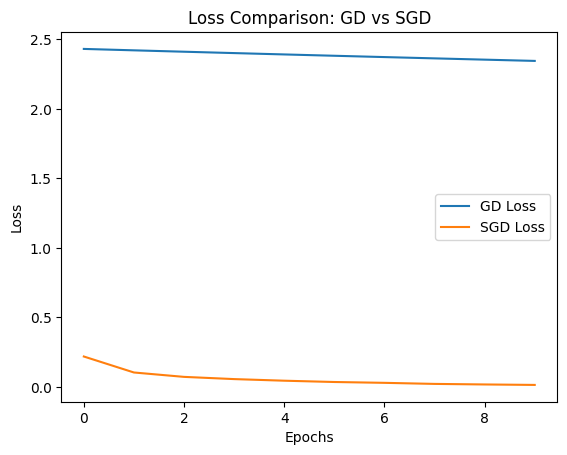

In [ ]:
#1b
''' 
Aim: Implement numerical computation techniques in Python, focusing on
handling overflow and underflow.

Gradient Descent (GD):
Goal: To minimize the loss functions by iteratively adjusting parameters (weights)
The algorithm computes the gradient (partial derivatives) of the loss
function with respect to each parameter and updates the parameters in the
opposite direction of the gradient to reduce the loss.

Stochastic Gradient descent:
The difference between the gradient and stochastic gradient  is that GD computes the whole dataset
whereas Stochastic updates the parameters based on the gradient of a single data point at each iteration.
It uses same formula as GD but it uses one data point at a time
'''

import tensorflow as tf #Deep learning library to build models
from tensorflow import keras #High level API inside TF for easy creation of models
from tensorflow.keras import layers #Short way to access keras layers.
import numpy as np #For numerical operations
import matplotlib.pyplot as plt #For plotting graphs

# Load MNIST dataset (Hand written digits)
#Splitting the data into training set and testing.
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0 # Normalize pixel values
#Dividing by 255 normalizes pixel values between 0 and 1, making learning faster and better.

# Define a simple deep learning model
def create_model(): #Function that will build network
    model = keras.Sequential([  #Sequential means layers are stacked one after another.
    layers.Flatten(input_shape=(28, 28)), #Converts 28*28 image into 1D array of 784 elements
    layers.Dense(128, activation='relu'), #Fully connected layer with 128 neurons using ReLU activation.
    layers.Dense(10, activation='softmax') #Again fully connected output layer with 10 neurons using softmax
    ])
    return model

# Compile and train using Batch Gradient Descent (GD)
model_gd = create_model() #Creates fresh model by calling the previous function
model_gd.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), #SGD: Stochastic Gradient Descent
    loss='sparse_categorical_crossentropy', #Labels are integers
    metrics=['accuracy'])

print("Training with Batch Gradient Descent...")
history_gd = model_gd.fit(x_train, y_train, epochs=10, batch_size=60000, validation_data=(x_test, y_test))
#1 Epoch : Run over the  whole dataset once. So 10 epochs means run over the full data 10 times
#Batch : 60000 -> Entire dataset is one batch that's why it is called batch gradient descent


# Compile and train using Stochastic Gradient Descent (SGD)
model_sgd = create_model()
model_sgd.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

print("Training with Stochastic Gradient Descent...")
history_sgd = model_sgd.fit(x_train, y_train, epochs=10, batch_size=1, validation_data=(x_test,y_test))
#Here the batch size is 1 that is the main difference between Batch GD and Stochastic GD

# Plot training loss for both methods for each epoch
plt.plot(history_gd.history['loss'], label='GD Loss')
plt.plot(history_sgd.history['loss'], label='SGD Loss')
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.title('Loss Comparison: GD vs SGD')
plt.legend()
plt.show()

''' 
Batch Gradient Descent: Updates weights once per epoch (using full training set at once).
Stochastic Gradient Descent: Updates weights after each training sample.
GD is stable but slow to converge. SGD is noisy but can reach minima faster sometimes.
'''

In [ ]:
#1C
''' 
Aim: Implement constrained optimization algorithms and apply them to
example linear least square.

Constrained Optimization: It involves minimizing a function subject to certain constraints.

Linear least Square: Goal is to minimize the sum of squared residuals between observed data and model predictions.

Constrained optimization methods: 
1. Langrange Multipliers: Introduces auxiliary variables to incorporate constraints into the optimization problem.
2. Quadratic programming: Solves constrained least squares problems, optimizing a quadratic objective function sbject ton linear constraints.

To implement this we have a library scipy.optimize.minimize to solve connstrained least squares
problem with bounds.
'''
import numpy as np #For matrix and vector calculations
from scipy.optimize import minimize #A function to find minimum of an obj function

def objective_function(x, A, b):
    """Linear Least square objective function: ||Ax-b||^2"""
    return np.linalg.norm(A @ x - b)**2
# @ - Matrix multiplication
#np.linalg.norm() - Calculates the Euclidean norm and then **2 squared it
#We are solving least squares problem - Finding x st Ax is as close as possible to b.

np.random.seed(42) #Setting a random seed so that the results are reproducible
A = np.random.rand(5, 3) # 5 equations, 3 unknowns
b = np.random.rand(5)
#More equations then unknowns

# Initial guess (random start)
x0 = np.random.rand(3)

# Constraints: x >= 0 (Non-negativity constraint)
constraints = ({'type': 'ineq', 'fun': lambda x: x})

# Perform Constrained Optimization
result = minimize(objective_function, x0, args=(A, b), method='SLSQP', constraints=constraints)

#Goal is to find the best x that minimizes ||Ax-b||^2 while keeping all x >= 0
# Output the results
print("Optimized x:", result.x)
print("Objective function value:", result.fun)
print("Success status:", result.success)
print("Message:", result.message)

Optimized x: [0.24725794 0.14658039 0.24894753]
Objective function value: 0.11708602983381579
Success status: True
Message: Optimization terminated successfully
